In [5]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

In [6]:
data=pd.read_csv("Opportunity Dataset - Opportunities.csv")

In [7]:
data.head()

,ID,Headline,Description,Funding,Deadline,Official Link,Type of opportunity,Sub tags,Discipline,Minimum Qualification / Applicable for,Countries eligible,Location of opportunity
0,1,International Fellowship World Forestry Center,WFC’s Discovery Museum was opened in 1971 to e...,NaN,2019-10-15,https://www.noticebard.com/call-for-applicatio...,Conferences,NaN,Humanities and Social Sciences,Bachelors,All,USA
1,2,City of Dreams Pavilion 2020: Call for Proposals,The current state of the world is such that bo...,NaN,2019-09-15,http://competitions.archi/competition/city-of-...,Conferences,NaN,Engineering and Technology,Masters,All,USA
2,3,Urban Confluence Silicon Valley Competition,The Competition is managed by the San José Lig...,NaN,2019-10-15,http://competitions.archi/competition/urban-co...,Competitions,NaN,Engineering and Technology,All,All,USA
3,4,REDEFINING LEARNING SPACES,The University of Louisiana at Lafayette is ex...,NaN,2019-09-15,http://competitions.archi/competition/redefini...,Competitions,NaN,Engineering and Technology,All,All,USA
4,5,Mozambique Preschool: Flor da Manhã,This competition gives you the opportunity to ...,NaN,2019-12-01,http://competitions.archi/competition/mozambiq...,Competitions,NaN,Engineering and Technology,All,All,Mozambique


In [8]:
#All elements are made lowercase
data.apply(lambda x: x.astype(str).str.lower())

,ID,Headline,Description,Funding,Deadline,Official Link,Type of opportunity,Sub tags,Discipline,Minimum Qualification / Applicable for,Countries eligible,Location of opportunity
0,1,international fellowship world forestry center,wfc’s discovery museum was opened in 1971 to e...,nan,2019-10-15,https://www.noticebard.com/call-for-applicatio...,conferences,nan,humanities and social sciences,bachelors,all,usa
1,2,city of dreams pavilion 2020: call for proposals,the current state of the world is such that bo...,nan,2019-09-15,http://competitions.archi/competition/city-of-...,conferences,nan,engineering and technology,masters,all,usa
2,3,urban confluence silicon valley competition,the competition is managed by the san josé lig...,nan,2019-10-15,http://competitions.archi/competition/urban-co...,competitions,nan,engineering and technology,all,all,usa
3,4,redefining learning spaces,the university of louisiana at lafayette is ex...,nan,2019-09-15,http://competitions.archi/competition/redefini...,competitions,nan,engineering and technology,all,all,usa
4,5,mozambique preschool: flor da manhã,this competition gives you the opportunity to ...,nan,2019-12-01,http://competitions.archi/competition/mozambiq...,competitions,nan,engineering and technology,all,all,mozambique
5,6,open competition to develop conceptual designs...,garage museum of contemporary art announces th...,nan,2019-08-16,http://competitions.archi/competition/open-com...,competitions,nan,all,all,all,russia
6,7,international urban design ideas competition b...,"in juli 2019, will berlin 2020 ggmbh launch th...",nan,2019-09-27,http://competitions.archi/competition/internat...,competitions,nan,engineering and technology,all,all,germany
7,8,restart contest,it encourages reflection on restructuring the ...,nan,2019-11-01,http://competitions.archi/competition/restart-...,competitions,nan,engineering and technology,all,all,france
8,9,international ideas competition: living in the...,the ministry of housing land planning and envi...,nan,2019-08-14,http://competitions.archi/competition/internat...,competitions,nan,engineering and technology,all,all,uruguay
9,10,2nd national ideas competition imuvi,the municipality of león through the municipal...,nan,2019-09-30,http://competitions.archi/competition/2nd-nati...,competitions,nan,management,all,all,france


In [9]:
data.dtypes

ID                                         int64
Headline                                  object
Description                               object
Funding                                   object
Deadline                                  object
Official Link                             object
Type of opportunity                       object
Sub tags                                  object
Discipline                                object
Minimum Qualification / Applicable for    object
Countries eligible                        object
Location of opportunity                   object
dtype: object

In [10]:
data = data.dropna(how='any')

In [11]:
data['Description'] = data['Description'].replace({"'ll": " "}, regex=True)

In [12]:
comb_frame = data['Discipline'].str.cat(" "+data['Sub tags'])

In [13]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(comb_frame)

In [15]:
#elbow method
true_k = 3

In [16]:
# initialize model with 15 to max 500 
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=500, n_init=15)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=3, n_init=15, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :15]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:
 management
 university
 natural
 sciences
 medicine
 life
 photography
 government
 admissions
 health
 business
 economics
 oxford
 education
 institute
Cluster 1:
 social
 humanities
 sciences
 university
 law
 economics
 rights
 human
 history
 studies
 journalism
 world
 science
 global
 young
Cluster 2:
 engineering
 technology
 university
 sciences
 harvard
 natural
 science
 computing
 computer
 management
 journalism
 school
 swansea
 social
 business


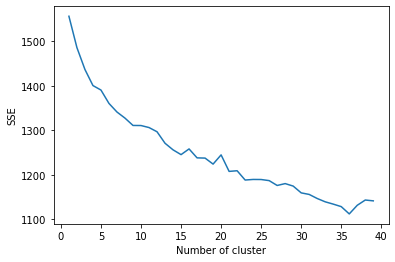

In [19]:
import matplotlib.pyplot as plt
# Sum of Squares errors stored here
sse = {}
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(X)
    comb_frame["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_
# Plotting the curve with 'k'-value vs SSE
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
# Save the Plot in current directory
plt.savefig('elbow_method.png')

In [18]:

import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# working with Recommendation System

In [19]:
with open('finalized_model.sav', 'rb') as fid:
    model = pickle.load(fid)

In [20]:
label_dict = {
                 0: "Management",
                 1: "Social Humanities",
                 2: "Engineering & Technology",
                
            }

In [22]:
# load the complete data in a dataframe
data=pd.read_csv("Opportunity Dataset - Opportunities.csv")

#Lower case
data=data.apply(lambda x: x.astype(str).str.lower())

data=data.dropna(how='any')

# Combination of three in a new column
data['InputString'] = data['Discipline'].str.cat(" "+data['Sub tags'])

data['ClusterPrediction'] = ""


def cluster_predict(str_input):
    Y = vectorizer.transform(list(str_input))
    prediction = model.predict(Y)
    return prediction

# Cluster category
data['ClusterPrediction']=data.apply(lambda x: cluster_predict(data['InputString']), axis=0)

In [23]:
data['InputString']

0                      humanities and social sciences nan
1                          engineering and technology nan
2                          engineering and technology nan
3                          engineering and technology nan
4                          engineering and technology nan
5                                                 all nan
6                          engineering and technology nan
7                          engineering and technology nan
8                          engineering and technology nan
9                                          management nan
10                                                all nan
11                                                all nan
12                                                all nan
13                                                all nan
14                                                all nan
15                                                all nan
16                                                all nan
17            

In [31]:
def recommend_util(str_input):
    
    #match on basis of Discipline and Input string is formed
    temp_df = data.loc[data['Discipline'] == str_input]
    temp_df['InputString'] = temp_df.Discipline.str.cat(" "+temp_df['Sub tags'])
    str_input = list(temp_df['InputString'])
    
  #category prediction
    prediction_inp = cluster_predict(str_input)
    prediction_inp = str(prediction_inp)
   
    temp_df = data.loc[data['ClusterPrediction'] == prediction_inp]
    temp_df = temp_df.sample(0)
    
    return list(temp_df['Discipline'])


In [32]:
if __name__ == "__main__":
    queries = ["engineering and technology","life sciences and medicine","natural sciences",\
               "humanities and social sciences"]
for query in queries:
    res = recommend_util(query)
    print(res)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/srv/conda/envs/notebook/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


[]
[]
[]
[]
